## A/B Test Experimentation: Guided Example

Our theoretical company is a social networking site, called BlueBird. BlueBird has been using the same advertising email for years, and some at the company are starting to feel that it's getting a little stale. As the data driven individual, you propose an experiment. The marketing department draws up a new version of the email, and you'll conduct an A/B test comparing the two emails.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [70]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [71]:
PATH = "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_2_wks.csv"
experiment_data = pd.read_csv(PATH)

In [72]:
experiment_data.head(10)

,treatment_date,test,is_signed_up,signup_date
0,2016-04-01,0,0,NaN
1,2016-04-01,0,0,NaN
2,2016-04-01,0,0,NaN
3,2016-04-01,0,0,NaN
4,2016-04-01,0,0,NaN
5,2016-04-01,0,0,NaN
6,2016-04-01,1,1,2016-04-02
7,2016-04-01,0,0,NaN
8,2016-04-01,0,0,NaN
9,2016-04-01,0,0,NaN


In [73]:
experiment_data.shape

(33613, 4)

In [74]:
experiment_data.columns

Index(['treatment_date', 'test', 'is_signed_up', 'signup_date'], dtype='object')

### How large is each group?

In [75]:
experiment_data[experiment_data.test==0].shape

(30241, 4)

In [76]:
experiment_data[experiment_data.test==1].shape

(3372, 4)

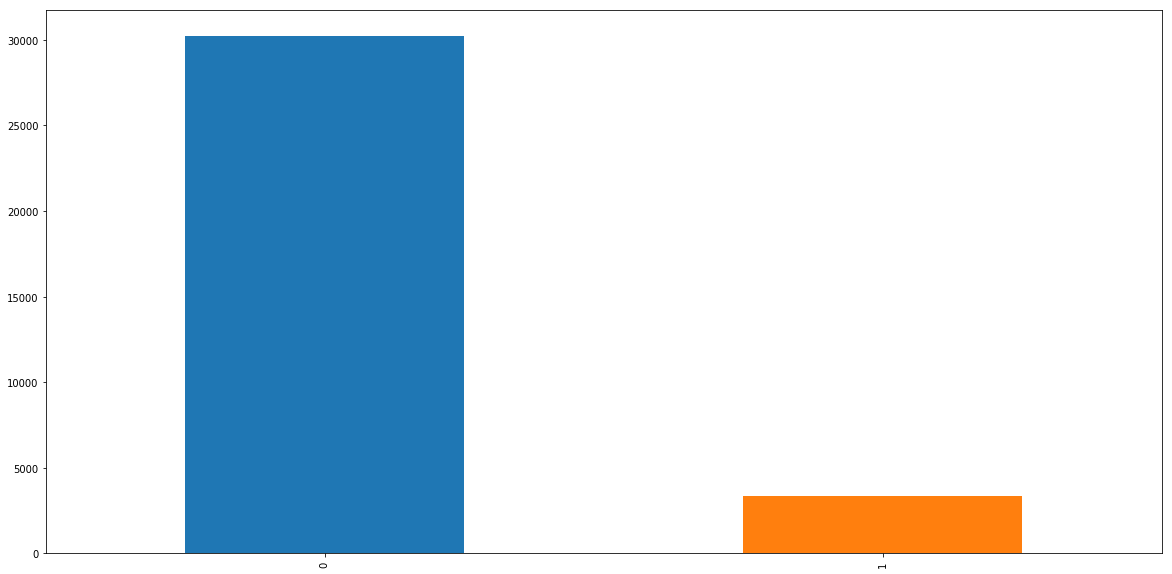

In [77]:
experiment_data['test'].value_counts().plot(kind='bar')

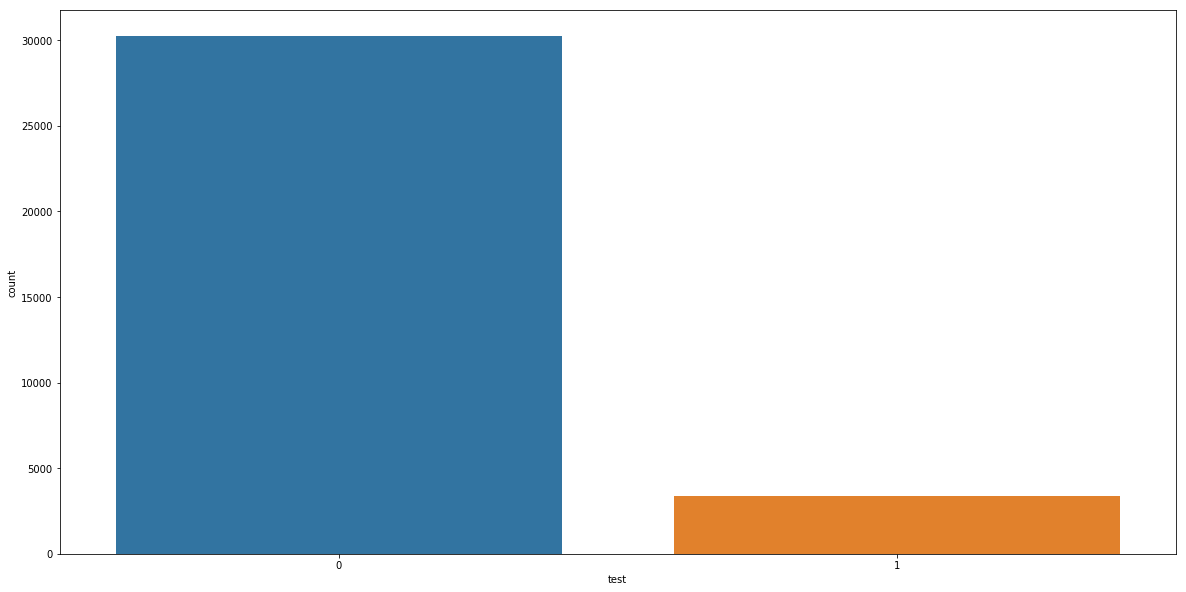

In [78]:
sns.countplot('test', data=experiment_data)

### What is the signup rate of test and control

In [79]:
test_group = experiment_data[experiment_data.test==1]

In [80]:
test_group['is_signed_up'].mean()

0.13701067615658363

In [81]:
control_group = experiment_data[experiment_data.test==0]

In [82]:
control_group['is_signed_up'].mean()

0.14708508316523924

### Is the experiment already significant?
The p value is greater than 0.05, therefore the null hypothesis can not be rejected. Hence there is no significant difference between the groups

In [83]:
stats.ttest_ind(test_group['is_signed_up'],control_group['is_signed_up'])

Ttest_indResult(statistic=-1.5711354292574262, pvalue=0.11616060761145311)

In [84]:
0.11616060761145311 > 5/100

True

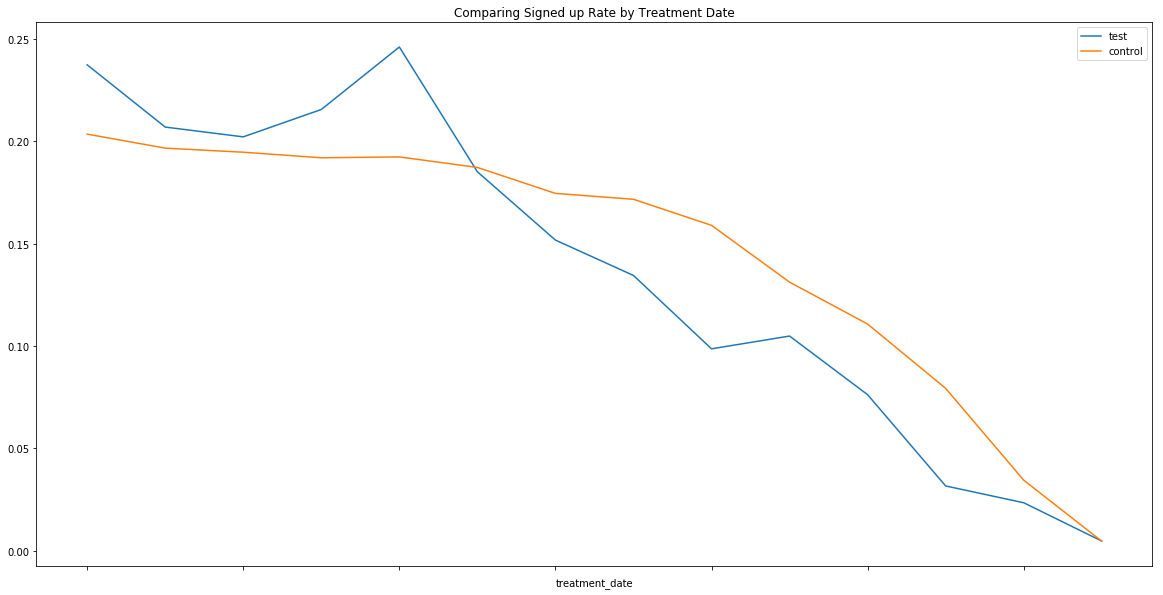

Ttest_indResult(statistic=1.171015382328547, pvalue=0.24172432121696255)
Ttest_indResult(statistic=0.39163213374090855, pvalue=0.6953630758340448)
Ttest_indResult(statistic=0.24114731791032132, pvalue=0.8094651742723448)
Ttest_indResult(statistic=1.006146671265253, pvalue=0.3144281887767212)
Ttest_indResult(statistic=1.7950152227404037, pvalue=0.0727950243234006)
Ttest_indResult(statistic=-0.07142256949339083, pvalue=0.9430681183812821)
Ttest_indResult(statistic=-0.99645401324533, pvalue=0.31911047625459077)
Ttest_indResult(statistic=-1.4059315672051254, pvalue=0.1598930922410899)
Ttest_indResult(statistic=-2.772772511643487, pvalue=0.0055926512303104605)
Ttest_indResult(statistic=-1.301097855458891, pvalue=0.19332775805677105)
Ttest_indResult(statistic=-1.6243695706046337, pvalue=0.10443285596458776)
Ttest_indResult(statistic=-2.559540254853317, pvalue=0.010550250694229046)
Ttest_indResult(statistic=-0.851793126290792, pvalue=0.3944212121535955)
Ttest_indResult(statistic=0.01447335288

In [85]:
fig = test_group[['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot()
control_group[['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot(ax = fig)
plt.legend(['test', 'control'])
plt.title('Comparing Signed up Rate by Treatment Date')
plt.show()

# test statistic comparing test and control on treatment date
for date in experiment_data.treatment_date.unique():
    dated_data = experiment_data[experiment_data.treatment_date== date]
    print(stats.ttest_ind(dated_data[dated_data.test==1].is_signed_up,
                           dated_data[dated_data.test==0].is_signed_up))
    


### Analyze Result for the Entire four weeks

In [ ]:
PATH = "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_final.csv"
full_exper_data = pd.read_csv(PATH)